In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Example 1 - Insurance Purchases

In [165]:
data = pd.read_csv("C:\\Users\\Imy Hull\\Desktop\Datasets_ml\insurance example.csv")

In [166]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [167]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
age                 27 non-null int64
bought_insurance    27 non-null int64
dtypes: int64(2)
memory usage: 512.0 bytes


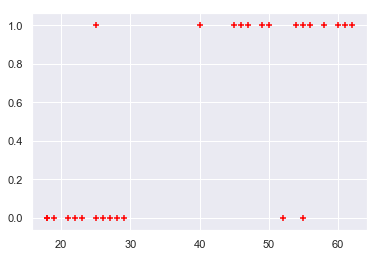

In [169]:
ax = plt.scatter(data.age,data.bought_insurance,marker='+',color='red')

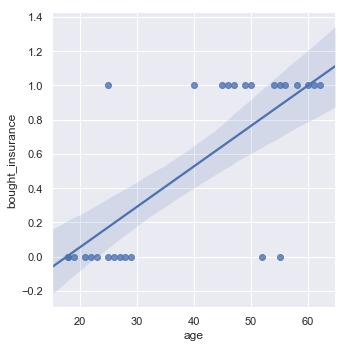

In [170]:
ax = sns.lmplot(x ='age', y ='bought_insurance', data = data) 

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[["age"]],data.bought_insurance,test_size = 0.2)

In [172]:
print(X_train.shape)
print(X_test.shape)

(21, 1)
(6, 1)


In [173]:
X_test

,age
13,29
12,27
5,56
0,22
17,58
21,26


In [174]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [175]:
model = model.fit(X_train,y_train)

In [176]:
y_pred = model.predict(X_test)

In [177]:
y_pred

array([1, 0, 1, 0, 1, 0], dtype=int64)

In [178]:
model.score(X_test,y_test)

0.8333333333333334

In [179]:
model.predict_proba(X_test)

array([[0.48401569, 0.51598431],
       [0.50773446, 0.49226554],
       [0.20667258, 0.79332742],
       [0.56664818, 0.43335182],
       [0.19154542, 0.80845458],
       [0.51958747, 0.48041253]])

In [180]:
model.predict([[45]])

array([1], dtype=int64)

# Example 2 - Employee Retention

In [181]:
data = pd.read_csv("C:\\Users\\Imy Hull\\Desktop\Datasets_ml\HR_comma_sep.csv")

In [182]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [183]:
data = data.rename(columns={'average_montly_hours': 'average_monthly_hours'})

## Data Exploration and Visualisation

In [184]:
# check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [185]:
# look at basic statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


0    11428
1     3571
Name: left, dtype: int64


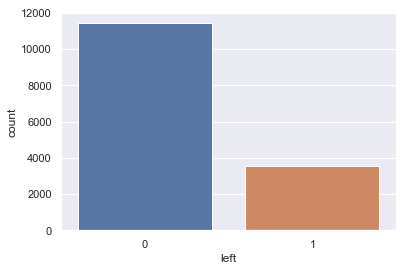

In [186]:
# Compare count of those who left compared to those who stayed
left_ratio = data.left.value_counts()
print(left_ratio)
ax = sns.countplot(x = "left",data = data)

In [187]:
# Comparison of salary levels of those who left and didn't
salary_comp = pd.crosstab(data.salary,data.left)
print(salary_comp)

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


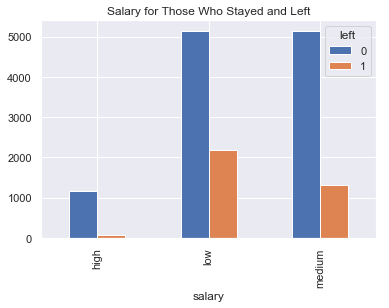

In [188]:
salary_comp.plot(kind = "bar")
ax = plt.title("Salary for Those Who Stayed and Left")

Of those who left, the majority were on low and medium salaries. Those on higher salaries tended to stay.

In [189]:
# Comparison of number of projects of those who left and didn't
proj_comp = pd.crosstab(data.number_project,data.left)
print(proj_comp)

left               0     1
number_project            
2                821  1567
3               3983    72
4               3956   409
5               2149   612
6                519   655
7                  0   256


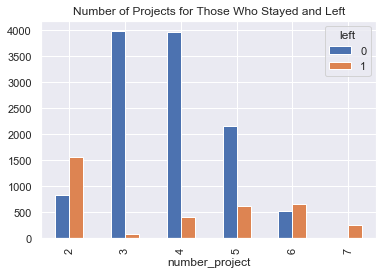

In [190]:
proj_comp.plot(kind = "bar")
ax = plt.title("Number of Projects for Those Who Stayed and Left")

The majority of those who left had only two projects. Could be because under utilised or maybe working on larger or longer projects. Not possible to tell from the data.

In [191]:
# Comparison of number of projects of those who left and didn't
dept_comp = pd.crosstab(data.Department,data.left)
print(dept_comp)

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


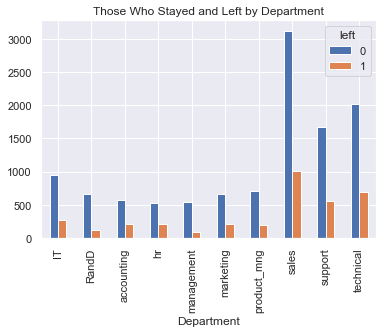

In [192]:
dept_comp.plot(kind = "bar")
ax = plt.title("Those Who Stayed and Left by Department")

Seems as though the Sales Department has the biggest problems with retention. Also technical and support.

In [193]:
# Group the data by left and stayed and calculate the means
data.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Those who left less likely to have been promoted in the last five years.
Those who left tended to do more hours each month
Those who stayed had higher satisfaction than those who left

## Create dummy variables for Salary

In [194]:
data.salary.describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [195]:
# Convert salary to dummy variable and drop one to avoid the dummy trap
salary = pd.get_dummies(data.salary, drop_first = True)
data = pd.concat([data,salary],axis = 1 )

In [196]:
data.drop(columns = "salary",inplace = True)

In [197]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0


In [198]:
X = data[["satisfaction_level","average_monthly_hours","promotion_last_5years","low","medium"]]
y = data.left

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [200]:
print(len(X_train))
print(len(X_test))

11999
3000


In [201]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [202]:
model = model.fit(X_train,y_train)

In [203]:
model.score(X_test,y_test)

0.7623333333333333

In [204]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


# Example 3 - Digit Dataset from Sklearn

In [205]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [215]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [219]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

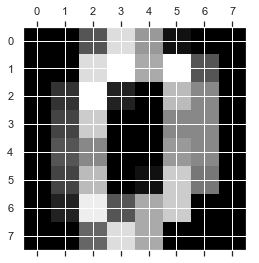

In [214]:
plt.gray() 
ax = plt.matshow(digits.images[0])

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,
                                                 test_size = 0.2,random_state = 42)

In [221]:
print(len(X_train))
print(len(X_test))

1437
360


In [222]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [223]:
model.score(X_test,y_test)

0.9611111111111111

In [224]:
y_pred = model.predict(X_test)

In [225]:
model.predict(digits.data[[53]])

array([8])

In [226]:
digits.target[[53]]

array([8])

In [227]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
conf

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 36]], dtype=int64)

Text(21.5, 0.5, 'Actual')

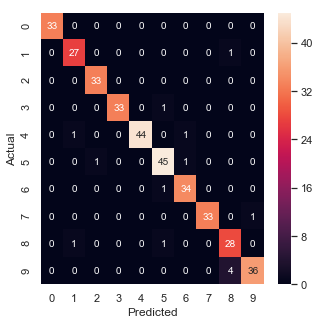

In [230]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(conf, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Example 4 - Iris Flower Dataset

In [396]:
data = pd.read_csv("C:\\Users\\Imy Hull\\Desktop\Datasets_ml\iris.csv")

In [397]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [398]:
data.drop("Id",axis = 1,inplace = True)

In [399]:
data.shape

(150, 5)

In [400]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [401]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [402]:
data.groupby("Species").mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


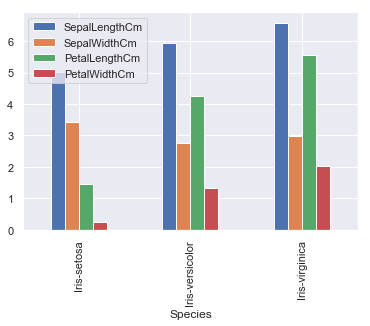

In [403]:
spec = data.groupby("Species").mean().plot(kind = "bar")

In [404]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [405]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [406]:
data["species"] = le.fit_transform(data.Species)

In [407]:
data.drop("Species",axis = 1, inplace = True)

In [408]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [409]:
X = data.drop("species",axis = 1)
y = data.species

In [410]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [411]:
len(X_test)

30

In [412]:
model = model.fit(X_train,y_train)

In [413]:
model.score(X_test,y_test)

1.0

In [414]:
y_pred = model.predict(X_test)

In [415]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [417]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [418]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(21.5, 0.5, 'Actual')

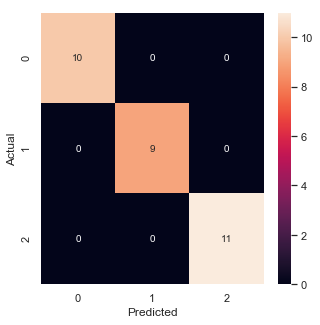

In [419]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')